In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

# File Path
file_path = r"D:\fishinggame\ExportedData\Fishing_1006001_Dense_20260107_154037\Fishing_1006001_Global.npy"

# Check if file exists
if os.path.exists(file_path):
    print(f"File found: {file_path}")
    # Load Data
    data = np.load(file_path)
    print(f"Data Shape: {data.shape}")
    print(f"Data Type: {data.dtype}")
else:
    print(f"File NOT found: {file_path}")


File found: D:\fishinggame\ExportedData\Fishing_1006001_Dense_20260107_154037\Fishing_1006001_Global.npy
Data Shape: (134, 8, 134)
Data Type: int32


Preparing visualization data...
Transposed Shape: (134, 134, 8)
Color array generated.
Rendering voxels... (this may take a moment)


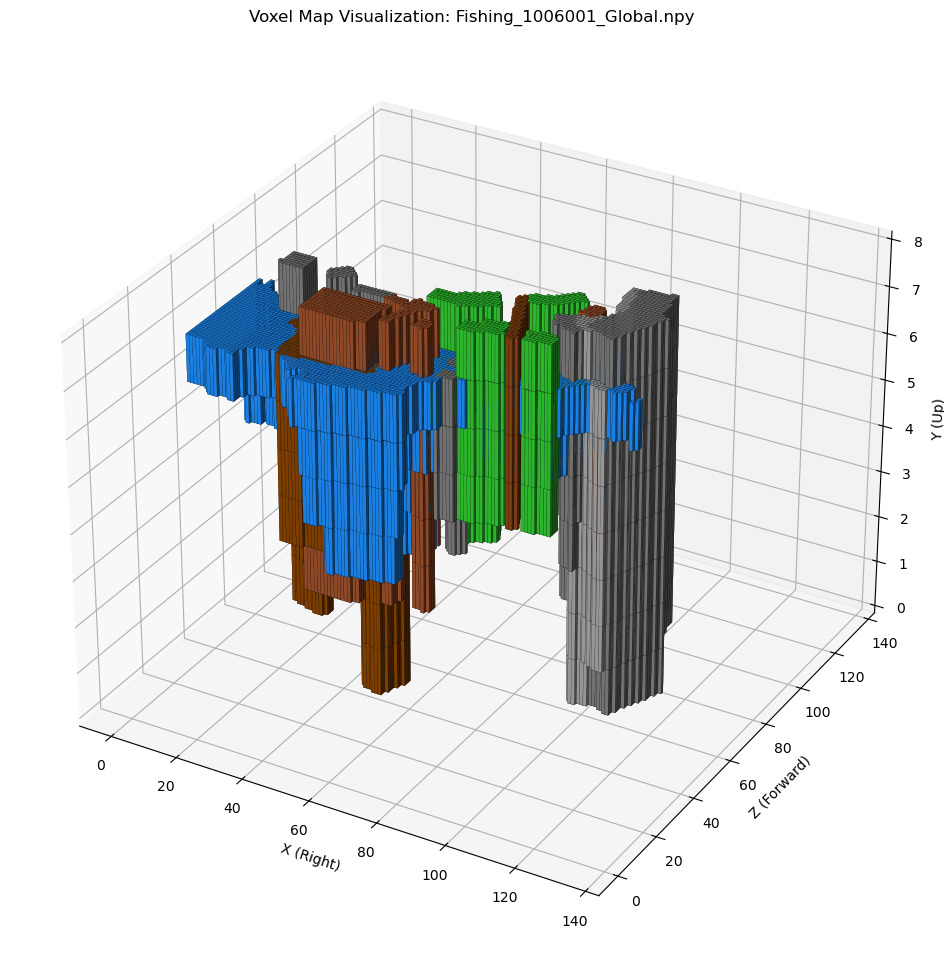

In [2]:
import matplotlib.colors as mcolors

# Bitmask Constants (Int32)
FLAG_WATER = 1 << 0
FLAG_WATER_GRASS = 1 << 1
FLAG_STONE = 1 << 2
FLAG_DRIFTWOOD = 1 << 3
FLAG_PIER = 1 << 4
FLAG_DEEP_PIT = 1 << 5
FLAG_RIDGE = 1 << 6
FLAG_FAULT = 1 << 7
FLAG_ROCK_SHELF = 1 << 8
FLAG_BAY = 1 << 9
FLAG_MUD = 1 << 10
FLAG_GRAVEL = 1 << 11

def get_voxel_color(val):
    if val == 0: return None
    
    # Priority: Features > Bottom Type > Water
    if val & FLAG_PIER: return '#8B4513'      # SaddleBrown
    if val & FLAG_DRIFTWOOD: return '#A0522D' # Sienna
    
    if val & FLAG_WATER_GRASS: return '#32CD32' # LimeGreen
    
    if val & FLAG_STONE: return '#808080'     # Gray
    if val & FLAG_ROCK_SHELF: return '#696969'# DimGray
    
    if val & FLAG_DEEP_PIT: return '#00008B'  # DarkBlue
    if val & FLAG_RIDGE: return '#DAA520'     # GoldenRod
    if val & FLAG_FAULT: return '#FF4500'     # OrangeRed
    
    if val & FLAG_GRAVEL: return '#A9A9A9'    # DarkGray
    if val & FLAG_MUD: return '#8B4500'       # Darker Brown
    
    if val & FLAG_BAY: return '#4682B4'       # SteelBlue
    
    if val & FLAG_WATER: return '#1E90FF'     # DodgerBlue (Base Water)
    
    return '#000000' # Black for unknown

# Vectorized color mapping
# We can't easily vectorize the 'if' logic with a simple map, but we can use np.vectorize
# Or more efficiently, build a result array.
# Given the size (140k), np.vectorize or a simple loop is fine.

print("Preparing visualization data...")

# Transpose for Visualization: Unity(x,y,z) -> Matplotlib(x,z,y)
# Unity Y is up (Axis 1). Matplotlib Z is up (Axis 2).
# So we swap axes 1 and 2.
# Original: [X, Y, Z] = [134, 8, 134]
# Target:   [X, Z, Y] = [134, 134, 8]
vis_data = np.swapaxes(data, 1, 2)
print(f"Transposed Shape: {vis_data.shape}")

# Create boolean mask
filled = vis_data > 0

# Create color array
# Initialize with empty strings or RGBA
# We'll use a flat list for iteration to keep it simple or np.vectorize
v_get_color = np.vectorize(get_voxel_color)
colors = v_get_color(vis_data)

print("Color array generated.")

# Plotting
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

print("Rendering voxels... (this may take a moment)")
ax.voxels(filled, facecolors=colors, edgecolor='k', linewidth=0.1)

ax.set_xlabel('X (Right)')
ax.set_ylabel('Z (Forward)')
ax.set_zlabel('Y (Up)')

plt.title(f"Voxel Map Visualization: {os.path.basename(file_path)}")
plt.show()


New Notebook Created by Jupyter MCP Server